Customer Behavior Analysis for Tariff Selection
I have data on customer behavior who have already switched to these tariffs. My task is to build a classification model that predicts the appropriate tariff. Data preprocessing is not required — it has already been done.
Build a model with the highest possible accuracy. To successfully complete the project, I need to achieve at least 0.75 accuracy. Check the accuracy on the test set by myself.

## Project Description
The mobile operator "Megaline" found out that many customers still use legacy tariffs. They want to build a system that can analyze customer behavior and suggest a new tariff: "Smart" or "Ultra". You have data on customer behavior who have already switched to these tariffs (from the Statistical Data Analysis course project). Your task is to build a classification model that predicts the most suitable tariff. Data preprocessing is not required, as it has already been completed.

Data Description
Each row in the dataset contains information about the behavior of a single user for a month.
Available features:

calls — number of calls made

minutes — total duration of calls in minutes

messages — number of SMS messages sent

mb_used — amount of internet traffic used in MB

is_ultra — the tariff used during the month (Ultra = 1, Smart = 0)

## Step 1. Open and Explore the File

In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
df = pd.read_csv('/Users/fidanb/Downloads/yandex praktikum/all datasets/users_behavior.csv')
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [211]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


## Step 2. Split the Data into Training and Test Sets

In [72]:
# Used the train_test_split method to divide the data into training, validation, and test sets.

In [212]:
X = df.drop('is_ultra', axis=1)
y = df['is_ultra']

In [214]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, shuffle=True, test_size=0.2, random_state=12345)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, shuffle=True,  test_size=0.25, random_state=12345)

In [215]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape,X_valid.shape, y_valid.shape

((1928, 4), (1928,), (643, 4), (643,), (643, 4), (643,))

In [216]:
#Check disbalance

In [217]:
y_train.value_counts()

0    1339
1     589
Name: is_ultra, dtype: int64

In [218]:
y_valid.value_counts()

0    447
1    196
Name: is_ultra, dtype: int64

In [219]:
y_test.value_counts()

0    443
1    200
Name: is_ultra, dtype: int64

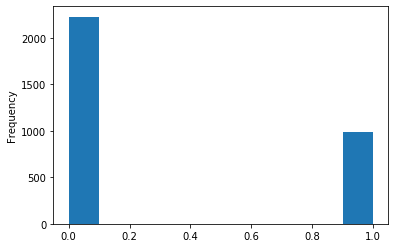

In [220]:
df['is_ultra'].plot(kind='hist');

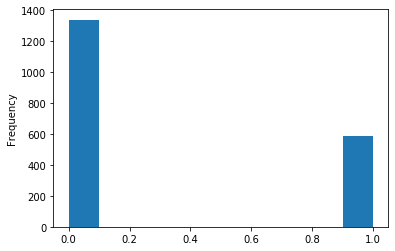

In [221]:
y_train.plot(kind='hist');

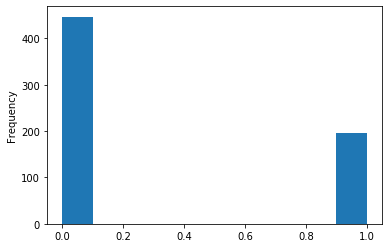

In [222]:
y_valid.plot(kind='hist');

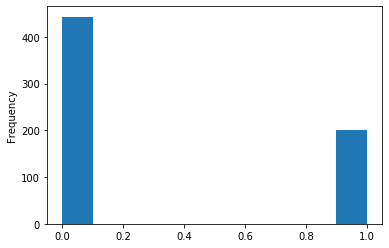

In [223]:
y_test.plot(kind='hist');

## Step 3. Explore the Models

In [224]:
dtc = DecisionTreeClassifier(random_state=12345)

In [225]:
params = {
          'max_depth' : [2,3,4,5,6,7,8,9,10],
          'min_samples_split': [2, 3, 4]
         }
grid_dtc = GridSearchCV(dtc, param_grid = params, verbose=1, cv=5)

In [226]:
grid_dtc.fit(X_train, y_train)
print('Best parameters found by grid search is:',grid_dtc.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best parameters found by grid search is: {'max_depth': 3, 'min_samples_split': 2}


[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    0.9s finished


In [227]:
train_predic = grid_dtc.predict(X_train)

In [228]:
score_dtc= grid_dtc.score(X_valid, y_valid)
print("Accuracy:", score_dtc)

Accuracy: 0.7869362363919129


In [229]:
rfc=RandomForestClassifier(random_state=12345)
param_grid = {
         'bootstrap': [False, True],
         'n_estimators': np.linspace(10, 100, 10).astype(int),
         'max_features': list(range(1, X.shape[1]+1))
    }

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)

In [230]:
CV_rfc.fit(X_train, y_train)
print('Best parameters found by grid search is:',CV_rfc.best_params_)

Best parameters found by grid search is: {'bootstrap': True, 'max_features': 1, 'n_estimators': 40}


In [231]:
score_rfc= CV_rfc.score(X_valid, y_valid)
print("Accuracy:", score_rfc)

Accuracy: 0.7884914463452566


In [232]:
lr = LogisticRegression(random_state=12345)
grid_values = {'penalty': ['l1', 'l2'],
               'C': np.logspace(0.1, 0.5, 1)
              }
grid_lr = GridSearchCV(lr, param_grid = grid_values, cv=5)

In [233]:
grid_lr.fit(X_train, y_train)
print('Best parameters found by grid search is:',grid_lr.best_params_)

Best parameters found by grid search is: {'C': 1.2589254117941673, 'penalty': 'l2'}


In [234]:
train_pred = grid_lr.predict(X_train)

In [235]:
score_lr= grid_lr.score(X_valid, y_valid)
print("Accuracy:", score_lr)

Accuracy: 0.7589424572317263


#### Conclusion: The model model_rfc_1, obtained using the Random Forest algorithm, showed the highest accuracy, so it will be used for evaluation on the test set.

## Step 4. Evaluate the Model on the Test Set

In [236]:
# Predicted the target for features_test using the model with the highest accuracy.
y_pred = CV_rfc.predict(X_test)

In [237]:
# Calculated the accuracy for the test set by comparing the true target values with the predicted ones.
test_score = accuracy_score(y_test, y_pred)
print('Accuracy Score on test data set:', test_score)

Accuracy Score on test data set: 0.7931570762052877



## Step 5. Check Model Adequacy

In [238]:
(df['is_ultra']==0).sum() / df.shape[0]

0.693528313627878

In [241]:
# calculate accuracy
from sklearn import metrics

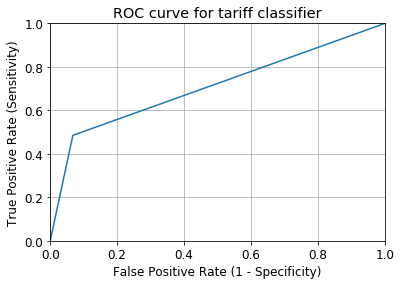

In [246]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for tariff classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)